# How to average a solution on a shell over a direction?

`average_on_shell_over_dirs` helps to average a solution over a given direction (`time`, `u` or `v`).

In [1]:
import numpy as np
import pyvista as pv
from pyvista.utilities.fileio import from_meshio

from kokiy import CartShell

pv.global_theme.background = 'white'
pv.global_theme.font.color = 'black'
pv.global_theme.cmap = 'coolwarm'
pv.set_jupyter_backend('static')

Let's start by creating a very simple shell (notice it will also work very smoothly for much more complex shapes).

In [2]:
n_trans, n_longi = 5, 6
zero = np.zeros(3)
umax = np.array([1., 0., 0.])
vmax = np.array([0., 1., 0.])
shell = CartShell(n_trans, n_longi, zero, umax, vmax)

To show how it works let's now create a very simple linear field (we have to assign a value to each of the shell nodes).

In [3]:
def field(x, t):
    return x[:, 0]*t

linear_fields = np.array([field(shell.xyz.reshape(-1, 3), t).reshape(shell.shape)
                for t in [1, 2, 3]])

This is how the field looks like for `t=1` (for other `t` the field looks similar, but it is scaled by a constant).

In [4]:
mesh = from_meshio(shell.get_mesh('quad'))
mesh['field'] = linear_fields[0].reshape(-1)

pl = pv.Plotter(notebook=True)
pl.add_mesh(mesh, show_edges=True)
pl.add_axes()
pl.view_xy()

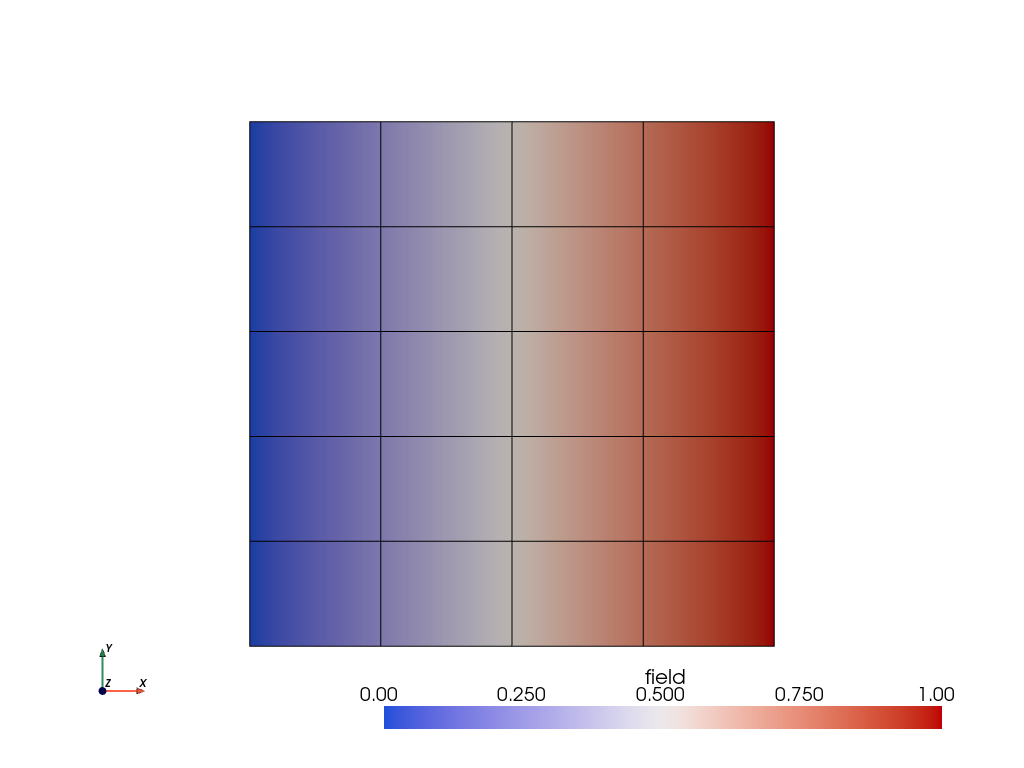

In [5]:
pl.show()

To average the fields over `u`:

In [6]:
shell.average_on_shell_over_dirs(linear_fields, directions=['u'],
                                 scale=False)

array([[0.  , 0.25, 0.5 , 0.75, 1.  ],
       [0.  , 0.5 , 1.  , 1.5 , 2.  ],
       [0.  , 0.75, 1.5 , 2.25, 3.  ]])

Notice the output is of shape `(n_steps, n_trans)`.

We can do the same over `v` (output of `shape=(n_steps, n_longi)`):

In [7]:
shell.average_on_shell_over_dirs(linear_fields, directions=['v'],
                                 scale=False)

array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [1. , 1. , 1. , 1. , 1. , 1. ],
       [1.5, 1.5, 1.5, 1.5, 1.5, 1.5]])

Or `t` (output of `shape=(n_trans, n_longi)`):

In [8]:
shell.average_on_shell_over_dirs(linear_fields, directions=['time'],
                                 scale=False)

array([[0. , 0. , 0. , 0. , 0. , 0. ],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [1. , 1. , 1. , 1. , 1. , 1. ],
       [1.5, 1.5, 1.5, 1.5, 1.5, 1.5],
       [2. , 2. , 2. , 2. , 2. , 2. ]])

It is also possible to perform combinations of directions: e.g. `u` and `v` simultaneously.

In [9]:
shell.average_on_shell_over_dirs(linear_fields, directions=['u', 'v'],
                                 scale=False)

array([0.5, 1. , 1.5])

**Note**: `scale=True` uses `surf` weights instead of considering the contribution of all nodes equal.

## How to perform operations other than the average?

`average_on_shell_over_dirs` is a particular case of `operate_on_shell_over_dirs`. The latter receives an `operator`, which is a function that acts on a `np.array` along an axis.

The following code is equivalent to the above use of `average_on_shell_over_dirs`:

```python
shell.operate_on_shell_over_dirs(linear_fields, directions=['u', 'v'], operator=np.mean)
```
